# Analyse exploratoire du jeu de données final
Ce notebook vise à analyser le fichier `final_dataset.csv` généré après le nettoyage et la fusion de toutes les sources de données (élections, pauvreté, revenu, etc.).

In [2]:
# Chargement des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# Chargement du jeu de données
df = pd.read_csv("../data/final/final_dataset.csv")
df.head()

,code_departement,nom_candidat,score,annee,tour,taux_chomage,nombre_auteurs_poursuivables,taux_pauvrete,population,revenu_median,logements_sociaux
0,1,BAYROU FRANCOIS,7.73,2002,1,4.45,NaN,NaN,535616.0,NaN,NaN
1,1,BESANCENOT OLIVIER,3.91,2002,1,4.45,NaN,NaN,535616.0,NaN,NaN
2,1,BOUTIN CHRISTINE,1.23,2002,1,4.45,NaN,NaN,535616.0,NaN,NaN
3,1,CHEVENEMENT JEAN-PIERRE,6.09,2002,1,4.45,NaN,NaN,535616.0,NaN,NaN
4,1,CHIRAC JACQUES,17.18,2002,1,4.45,NaN,NaN,535616.0,NaN,NaN


## Aperçu général

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   code_departement              886 non-null    int64  
 1   nom_candidat                  886 non-null    object 
 2   score                         886 non-null    float64
 3   annee                         886 non-null    int64  
 4   tour                          886 non-null    int64  
 5   taux_chomage                  886 non-null    float64
 6   nombre_auteurs_poursuivables  278 non-null    float64
 7   taux_pauvrete                 150 non-null    float64
 8   population                    698 non-null    float64
 9   revenu_median                 150 non-null    float64
 10  logements_sociaux             38 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 76.3+ KB


In [5]:
df.describe(include='all')

,code_departement,nom_candidat,score,annee,tour,taux_chomage,nombre_auteurs_poursuivables,taux_pauvrete,population,revenu_median,logements_sociaux
count,886.000000,886,886.000000,886.000000,886.000000,886.000000,278.000000,150.000000,6.980000e+02,150.000000,38.000000
unique,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,LE PEN MARINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,46.449210,NaN,9.425982,2008.422122,1.041761,7.926919,31970.514388,14.120000,1.219928e+06,10607.866667,100390.052632
std,86.258233,NaN,13.590430,5.985682,0.200155,2.099506,21948.498939,3.356492,5.877107e+05,954.603953,69560.965719
min,1.000000,NaN,0.010000,2002.000000,1.000000,4.400000,8401.000000,9.700000,5.111970e+05,9269.000000,29722.000000
25%,21.000000,NaN,1.100000,2002.000000,1.000000,6.475000,16304.000000,10.900000,8.536590e+05,9673.000000,49710.500000
50%,34.000000,NaN,3.085000,2007.000000,1.000000,7.525000,26728.500000,14.200000,1.082888e+06,10516.000000,67912.000000
75%,60.000000,NaN,13.500000,2012.000000,1.000000,9.200000,32385.000000,18.100000,1.409345e+06,11565.000000,148438.500000


## Analyse des valeurs manquantes

In [6]:
df.isnull().sum().sort_values(ascending=False)

logements_sociaux               848
taux_pauvrete                   736
revenu_median                   736
nombre_auteurs_poursuivables    608
population                      188
code_departement                  0
nom_candidat                      0
score                             0
annee                             0
tour                              0
taux_chomage                      0
dtype: int64

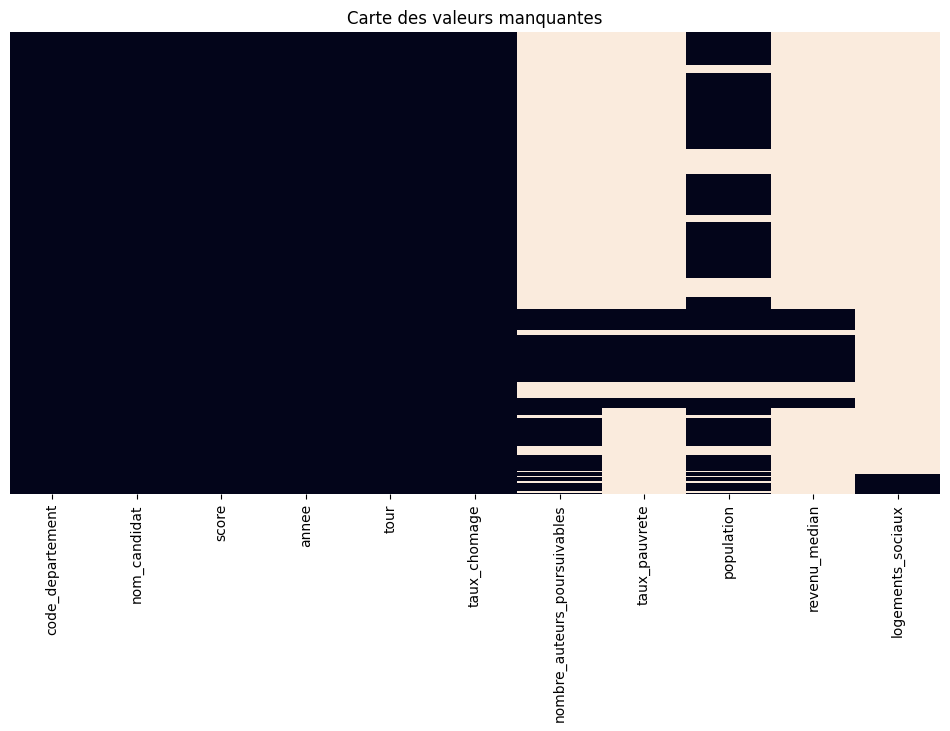

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Carte des valeurs manquantes")
plt.show()

## Distributions des indicateurs (pauvrete, criminalité, revenu, etc.)

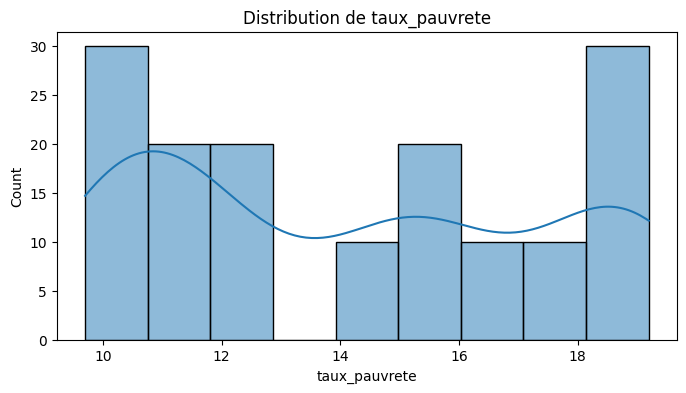

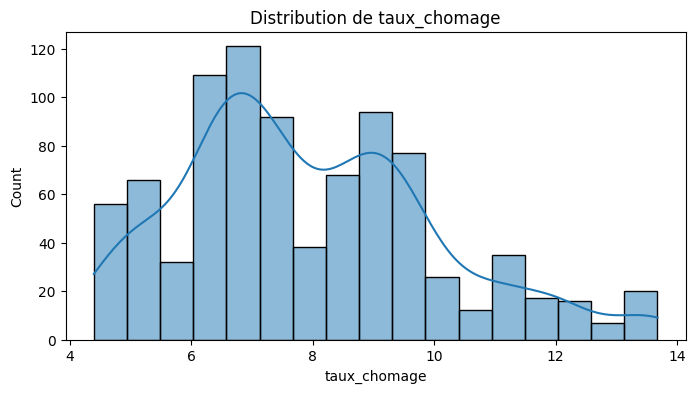

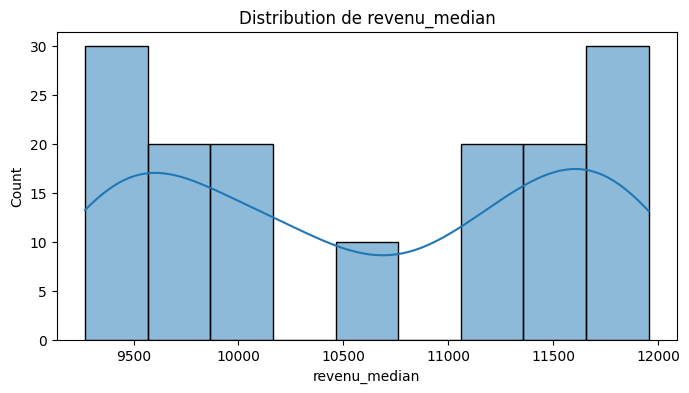

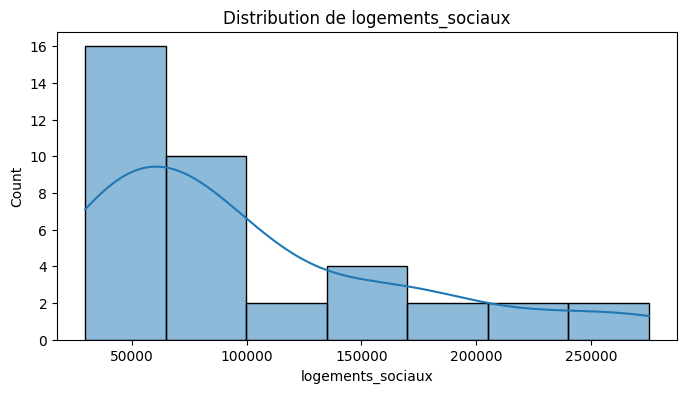

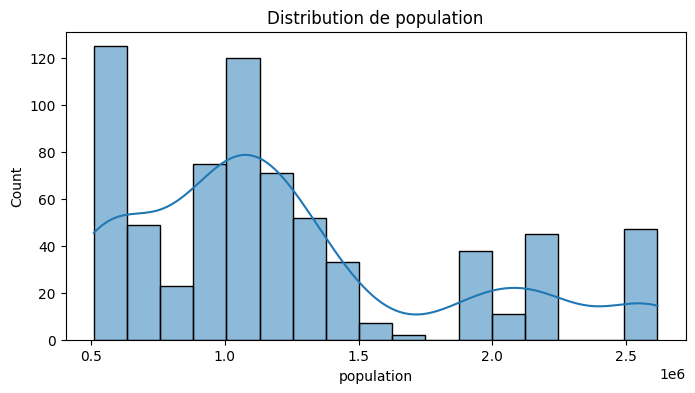

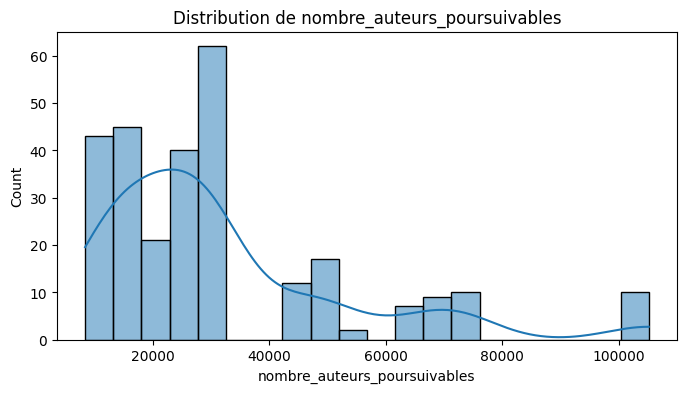

In [8]:
variables = ['taux_pauvrete', 'taux_chomage', 'revenu_median', 'logements_sociaux', 'population', 'nombre_auteurs_poursuivables']
for var in variables:
    plt.figure(figsize=(8,4))
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution de {var}")
    plt.show()

## Corrélations entre les variables

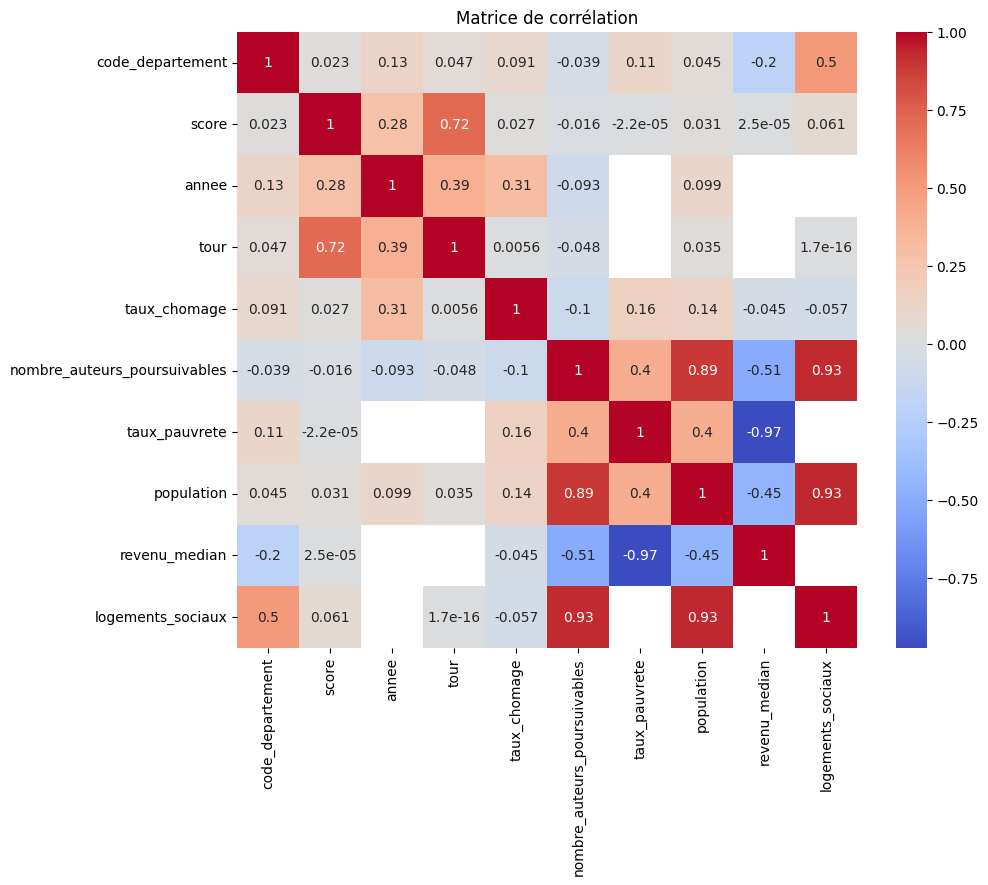

In [11]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


## Analyse univariée : Répartition des scores des candidats

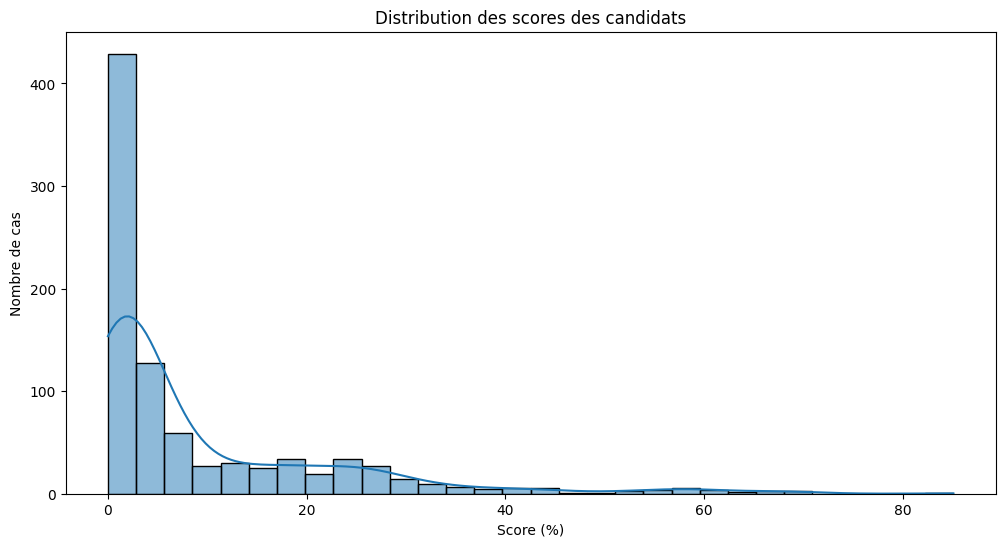

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df['score'], bins=30, kde=True)
plt.title('Distribution des scores des candidats')
plt.xlabel('Score (%)')
plt.ylabel('Nombre de cas')
plt.show()

## Analyse bivariée : Score vs taux de pauvreté

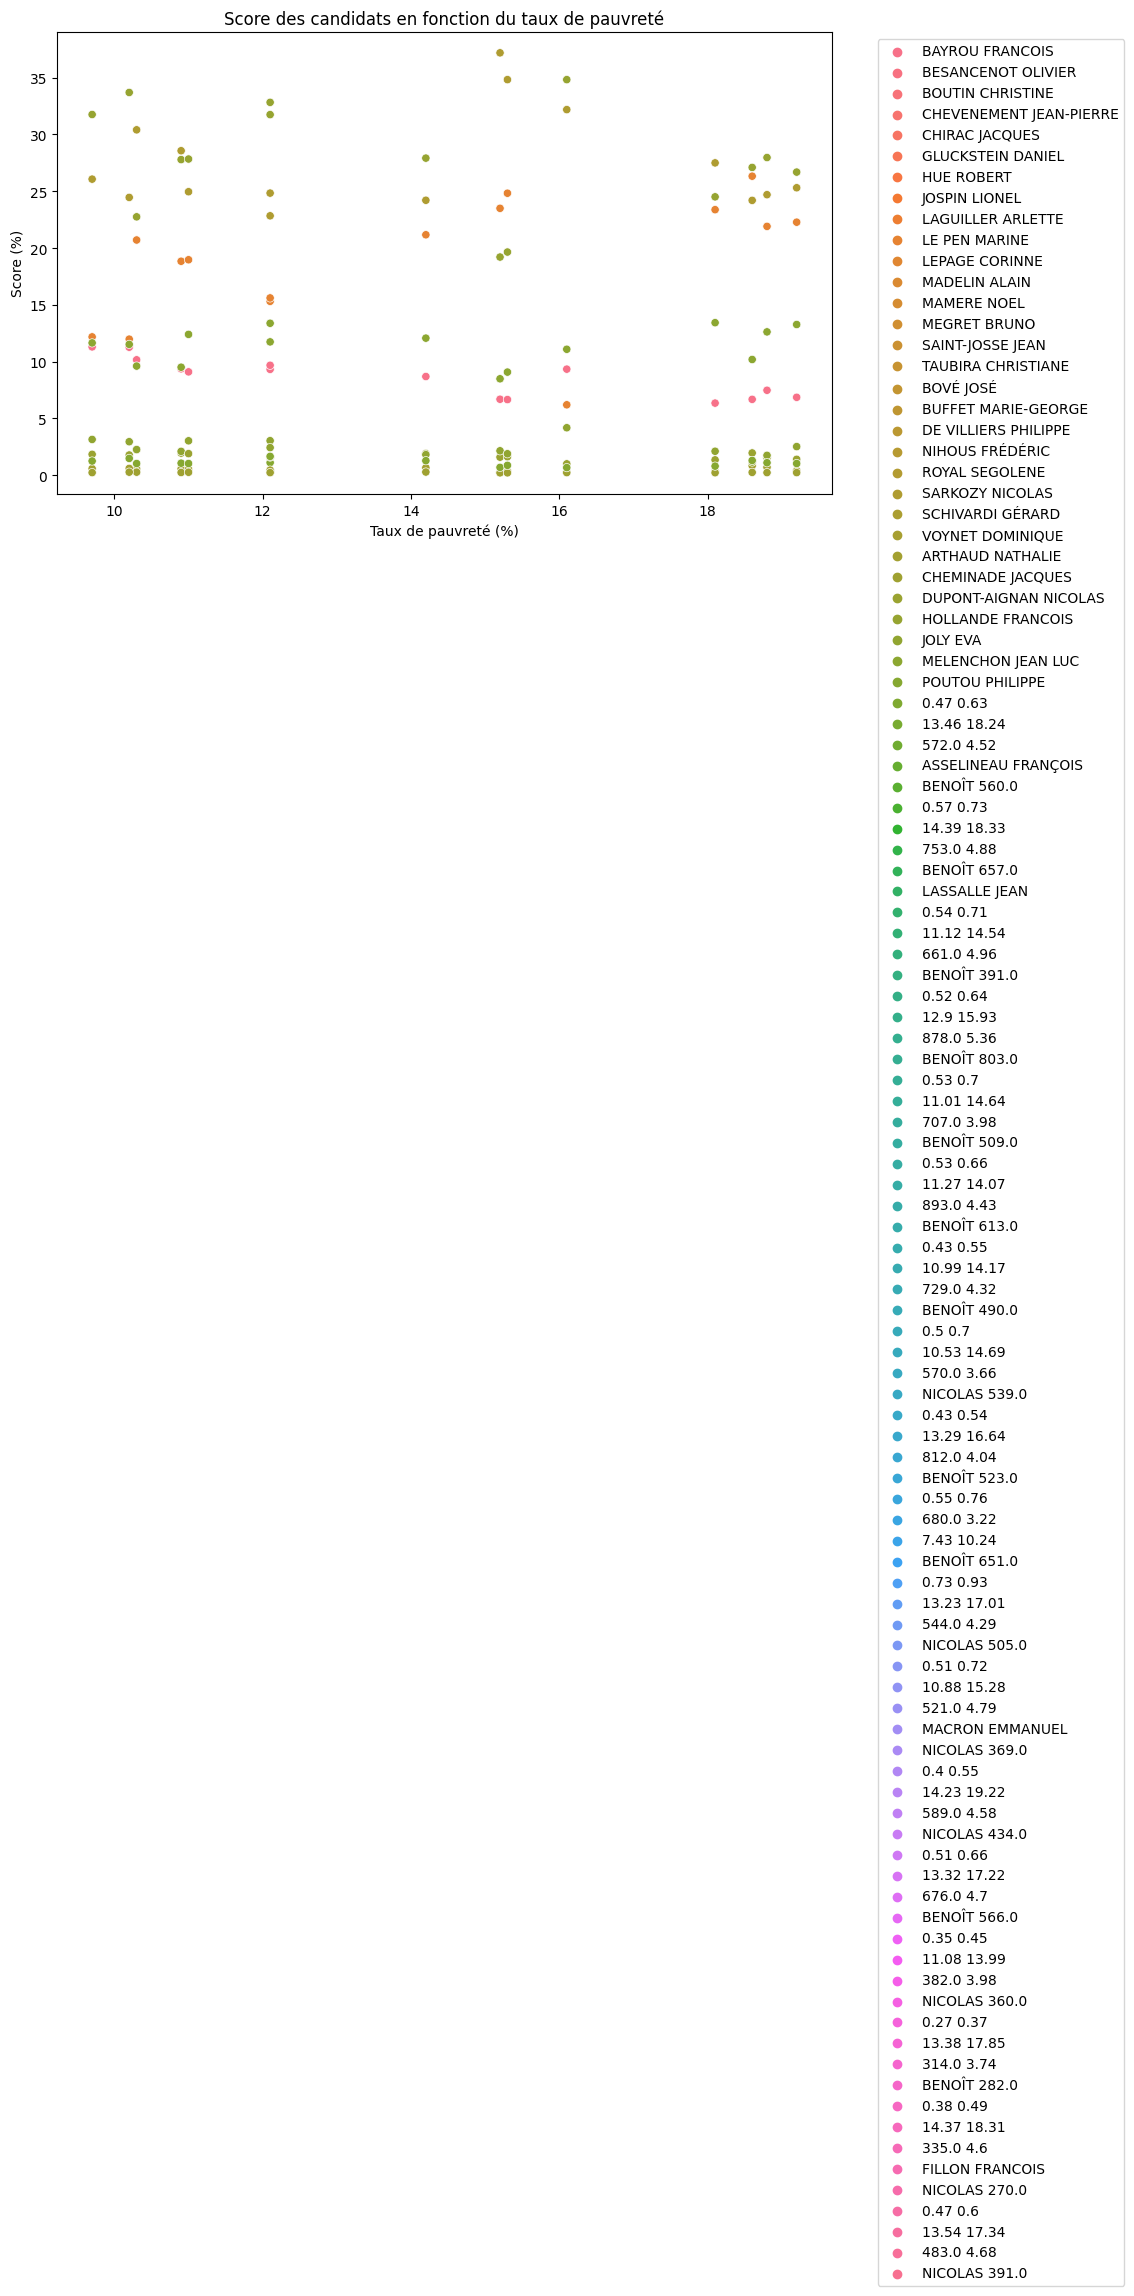

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='taux_pauvrete', y='score', hue='nom_candidat')
plt.title('Score des candidats en fonction du taux de pauvreté')
plt.xlabel('Taux de pauvreté (%)')
plt.ylabel('Score (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Analyse groupée : Moyenne des scores par candidat

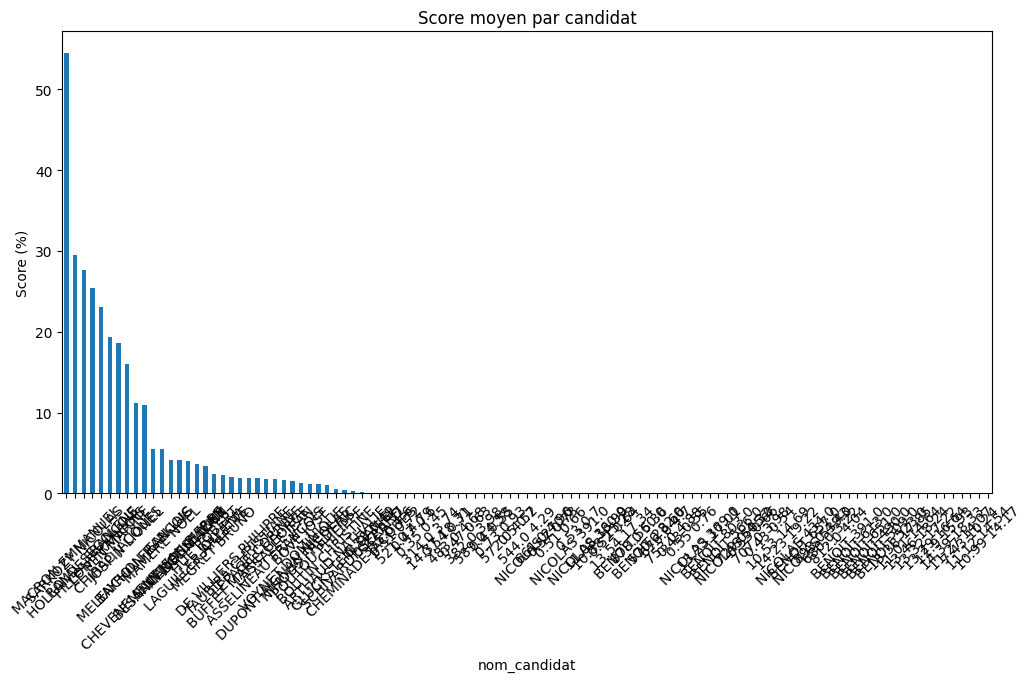

In [14]:
scores_moyens = df.groupby('nom_candidat')['score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
scores_moyens.plot(kind='bar')
plt.title('Score moyen par candidat')
plt.ylabel('Score (%)')
plt.xticks(rotation=45)
plt.show()

## Focus : Corrélation entre score de LE PEN MARINE et taux de pauvreté

Corrélation entre score de Le Pen et taux de pauvreté : 0.49


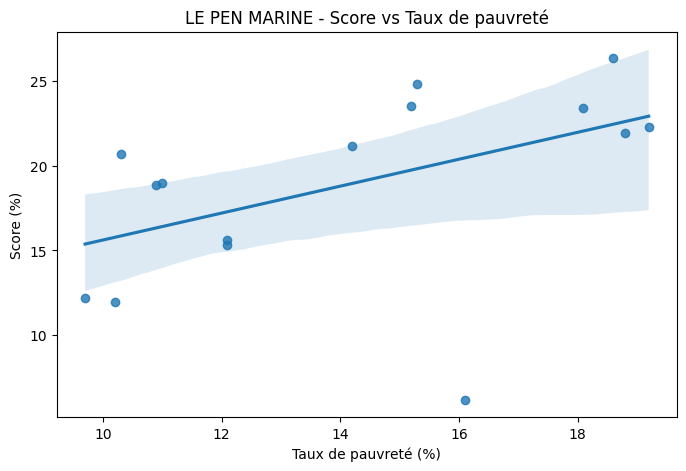

In [15]:
lepen = df[df['nom_candidat'] == 'LE PEN MARINE']
corr = lepen[['score', 'taux_pauvrete']].corr().iloc[0,1]
print(f"Corrélation entre score de Le Pen et taux de pauvreté : {corr:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(data=lepen, x='taux_pauvrete', y='score')
plt.title('LE PEN MARINE - Score vs Taux de pauvreté')
plt.xlabel('Taux de pauvreté (%)')
plt.ylabel('Score (%)')
plt.show()